# TD 6: Exemple de projet: modélisation de la ségrégation

objectif: reproduire https://ncase.me/polygons/

## 1. Produit fini

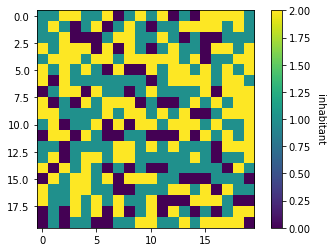

70.75 % Done


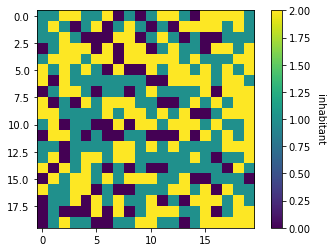

73.75 % Done


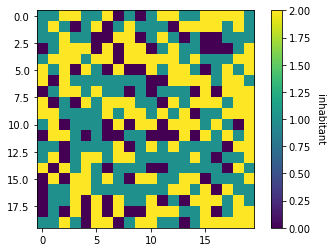

76.25 % Done


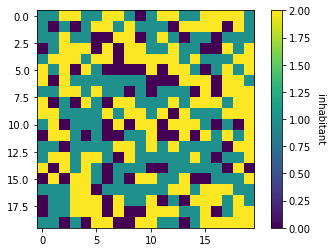

76.75 % Done


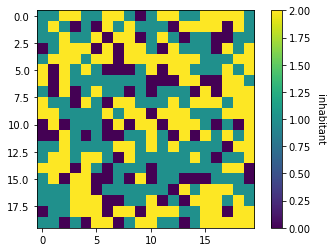

81.0 % Done


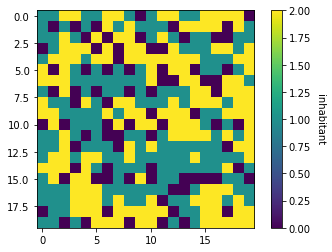

84.0 % Done


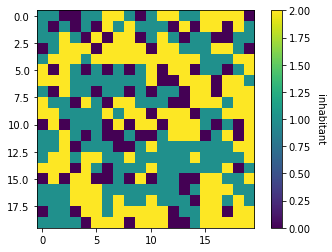

85.0 % Done


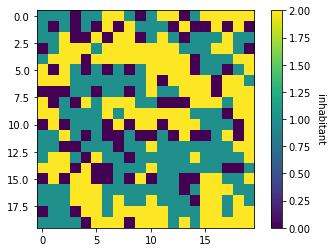

88.75 % Done


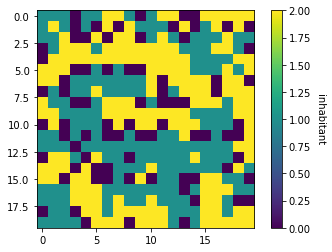

92.5 % Done


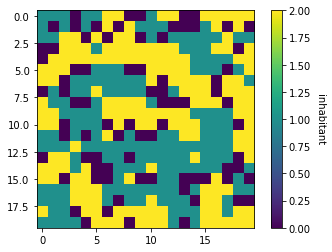

92.0 % Done


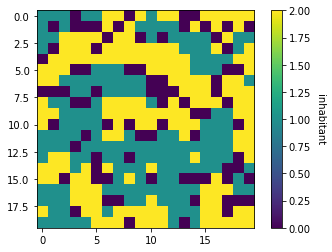

94.5 % Done


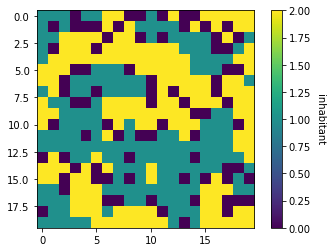

97.5 % Done


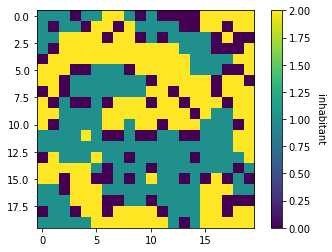

99.0 % Done


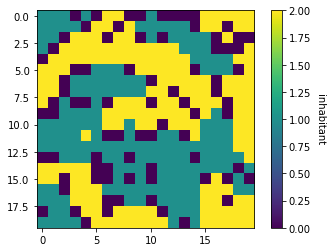

100.0 % Done


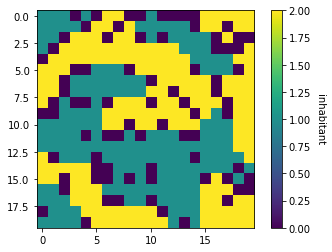

Done


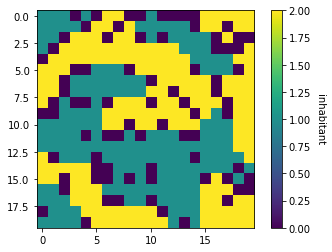

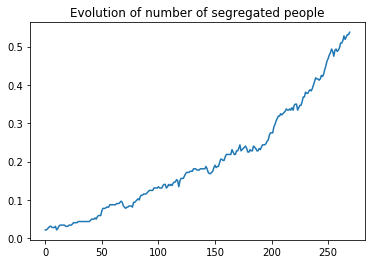

100%|██████████| 8/8 [00:17<00:00,  3.94s/it]


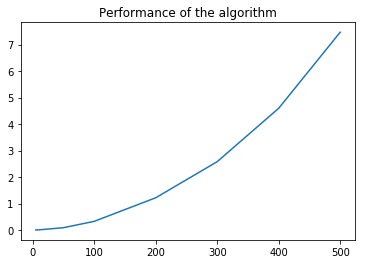

In [2]:
from solutions import create_city, performance_test

city = create_city(20)
city.run_simulation()
performance_test()

Voici l'objectif de ce TP: créer une ville où les habitants (les carrés jaunes et les carrés verts) sont répartis aléatoirement au départ. Si un habitant a disons moins de 50% de ces voisins de la même couleur que lui, il veut déménager. A chaque tour de jeu, on choisis aléatoirement un habitant voulant déménager, et on le déplace jusqu'à un espace libre (les cases bleues). On recommence ainsi jusqu'à ce que tous les habitants soient satisfaits.

Pour poursuivre, on peut suivre la ségrégation au cours des itérations. Celle-ci peut être mesuré par le nombre d'habitants n'ayant pas de voisins d'une couleur différente.

Enfin, on pourra étudier la performance de notre algorithme en fonction de la taille de la ville.

Pour faire cet exercice, vous aurez trois versions des consignes, de plus en plus guidées. Même si vous êtes tentés de regarder directement la troisième version, prenant 10 minutes pour réfléchir avec chaque version.

## Version 1: La débrouille

Pour cette version, je vais simplement vous guider sur les questions à vous poser pour résoudre ce problème:
- Comment modéliser la ville ?
- Comment modéliser un habitant ?
- Quelles sont les étapes au cours d'une itération ?
- Comment enchainer plusieurs itérations ?
- Que garder en mémoire ?

Au départ, ne prenez pas en compte la complexité de vos algorithmes. L'optimisation est utile, mais uniquement à la fin pour améliorer le programme!

Pour afficher les graphiques, je vous invite à regarder le package pyplot de matplotlib. Pour l'affichage de la ville, ne vous y attaquez pas avant d'avoir fini l'algorithme en entier. Si vous avez le temps, c'est une heatmap venant du même package.

Maintenant, vous pouvez ouvrir un nouveau notebook, et essayer! Bon courage :)

## Version 2: Des pistes plus précises

Avant d'attaquer cette version, réfléchissez aux questions précédentes. Cette version vous donnera les étapes de manière beaucoup plus précise.

1. Tout d'abord, ce projet sera quasiment uniquement composé d'une classe, représentant votre ville. Il y aura une fonction en plus pour créer une ville par défault et une fonction pour les tests de performances.

2. Votre ville en elle même est une grille, que vous pouvez représentez sous forme de numpy array. Les habitants seront des entiers.

3. Tout d'abord, occupez vous de créer votre ville, puis de la peupler aléatoirement.

4. Ensuite, écrivez une méthode pour choisir aléatoirement une personne voulant déménager.

5. Puis une méthode pour trouver une case libre

6. Puis une méthode pour faire déménager cet habitant

7. Faites une méthode pour faire une itération de jeu

8. Faites une méthode pour savoir si la simulation est terminée ou non (reste-t-il un habitant voulant déménager ?)

9. Faites une méthode pour faire des itérations tant que la simulation n'est pas terminée.

10. Faites une méthode pour mesurer la ségrégation

11. Modifier la méthode du 9 pour garder en mémoire la ségrégation étape par étape, puis pour l'afficher à la fin

12. Créer une fonction pour évaluer la performance de votre algorithme sur une dizaine d'itérations.

Et voila !

## Version 3: Des pistes encore plus précises

Nous allons reprendre les étapes précédentes.

Votre ville sera dans une classe City, et aura comme attribut un numpy array de taille donnée en argument du constructeur. Les cases vides seront des zéros, les habitants du premier type seront des uns, du deuxième type des deux...

Dans un premier temps, créez une classe City. Son constructeur créera la grille ne contenant que des zéros.

In [3]:
# Votre code

Dans un second temps, créez une méthode populate qui prendra en argument une liste de pourcentages, et qui va peupler aléatoirement la ville dans les proportions données.

Attention, vous allez devoir copier coller la classe City à chaque fois pour pouvoir la modifier.

In [4]:
# Votre code

Appeler maintent cette méthode dans le constructeur, en rajoutant donc dans les arguments de celui-ci la liste de pourcentages requise, et tester que tout fonctionne correctement en tester sur des cas simples.

In [5]:
# Votre code

Maintenant, écrivez une méthode qui, partant d'une position, renvoit si l'habitant associé dans la ville veut déménager. Attention au cas extrème: si il n'y a pas d'habitant, renvoyer faux; si un habitant n'a pas de voisin, renvoyer faux aussi.

In [6]:
# Votre code

Vous pouvez maintenant écrire une méthode choisissant aléatoirement un habitant voulant déménager. Celle-ci n'aura aucun argument autre que self, et renverra une position.

In [7]:
# Votre code

Codez ensuite une méthode choisissant aléatoirement un espace libre. Celle-ci n'aura aucun argument autre que self, et renverra une position.

In [8]:
# Votre code

Enfin, codez une méthode prenant deux positions en arguments, et échangeant les valeurs associées dans la grille. Cette méthode ne renverra rien.

In [9]:
# Votre code

En utilisant les trois fonctions précédentes, vous pouvez codez une méthode effectuant une itération: vous prenez aléatoirement un habitant voulant déménager, un espace libre, et effectuez ce déplacement.

In [10]:
# Votre code

En réutilisant la méthode qui dit si un habitant veut déménager, codez une méthode disant si il reste un habitant voulant déménager.

In [11]:
# Votre code

Vous pouvez maintenant codez une méthode faisant des itérations tant que la méthode précédente renvoit Vrai.

In [12]:
# Votre code

Si tout fonctionne, vous avez maintenant un programme tenant la route. Félicitations !

Vous pouvez maintenant passer à l'analyse des résultats, à l'analyse des performances, et à l'optimisation de ce programme :)

Voici ma version de ce programme, qui n'est pas optimisé non plus !

In [ ]:
# %load solutions.py 
import numpy as np
import time
from tqdm import tqdm
from matplotlib import pyplot as plt


def fill_randomly(arr, n, elem):
    pos = np.where(arr == 0)
    pos = list(zip(pos[0], pos[1]))
    if len(pos) < n:
        raise ValueError('Not enough place')
    np.random.shuffle(pos)
    for x, y in pos[:n]:
        arr[x, y] = elem


class City:

    def __init__(self, grid_size):
        self.grid = np.zeros((grid_size, grid_size))
        self.height = grid_size
        self.n_cases = grid_size ** 2
        self.tolerance = 0.55

    def populate(self, percentages):
        if sum(percentages) > 1:
            raise ValueError('Too many people !')
        for i in range(len(percentages)):
            n_to_fill = int(self.n_cases * percentages[i])
            fill_randomly(self.grid, n_to_fill, i + 1)

    def __repr__(self):
        return str('\n'.join([str(l) for l in self.grid]))

    def want_to_move(self, x, y):
        if self.grid[x, y] == 0:
            return False
        n_neighbors = -1
        n_same_neighbors = -1
        for i in [-1, 0, 1]:
            if x + i >= 0 and x + i < len(self.grid):
                for j in [-1, 0, 1]:
                    if y + j >= 0 and y + j < len(self.grid):
                        n_neighbors += (self.grid[x + i, y + j] != 0)
                        n_same_neighbors += (self.grid[x + i, y + j] == self.grid[x, y])
        return (n_neighbors != 0) and (n_same_neighbors / n_neighbors < self.tolerance)

    def next_move(self):
        possible_pos = [(x, y) for x in range(self.height) for y in range(self.height)]
        move_from = None
        move_to = None
        np.random.shuffle(possible_pos)
        for x, y in possible_pos:
            if move_from is None and self.want_to_move(x, y):
                move_from = (x, y)
            elif move_to is None and self.grid[x, y] == 0:
                move_to = (x, y)
            if move_from is not None and move_to is not None:
                break
        return (move_from, move_to)

    def move(self, move_from, move_to):
        if self.grid[move_to] != 0:
            raise ValueError('Not a empty spot')
        self.grid[move_to] = self.grid[move_from]
        self.grid[move_from] = 0

    def is_complete(self):
        for x in range(self.height):
            for y in range(self.height):
                if self.want_to_move(x, y):
                    return False
        return True

    def percentage_complete(self):
        n = 0
        for x in range(self.height):
            for y in range(self.height):
                if self.want_to_move(x, y):
                    n += 1
        return n / self.n_cases

    def run_n_iterations(self, iter_max=100, verbose=1):
        history = [self.compute_segregation()]
        if self.is_complete():
            return True, history
        for n_iter in range(iter_max):
            if verbose:
                print(f'Iteration {n_iter + 1}')
            t0 = time.time()
            move_from, move_to = self.next_move()
            self.move(move_from, move_to)
            history.append(self.compute_segregation())
            if self.is_complete():
                return True, history
            t1 = time.time()
            if verbose:
                print(f'Done in {t1-t0} secondes.')
        return False, history

    def run_simulation(self):
        history = [self.compute_segregation()]
        is_complete = False
        self.show()
        while not is_complete:
            is_complete, current_history = self.run_n_iterations(iter_max=20, verbose=0)
            history += current_history[1:]
            print(f'{100 - self.percentage_complete() * 100} % Done')
            self.show()
        print('Done')
        self.show()
        plt.plot(history)
        plt.title('Evolution of number of segregated people')
        plt.show()

    def is_segregated(self, x, y):
        inhabitant = self.grid[x, y]
        for i in [-1, 0, 1]:
            if x + i >= 0 and x + i < self.height:
                for j in [-1, 0, 1]:
                    if y + j >= 0 and y + j < self.height and (i != 0 or j != 0):
                        if self.grid[x + i, y + j] != inhabitant and self.grid[x + i, y + j] != 0:
                            return False
        return True

    def compute_segregation(self):
        n_inhabitants = 0
        n_segregated = 0
        for i in range(self.height):
            for j in range(self.height):
                if self.grid[i, j] != 0:
                    n_inhabitants += 1
                    n_segregated += self.is_segregated(i, j)
        return n_segregated / n_inhabitants

    def show(self):
        fig, ax = plt.subplots()
        im = ax.imshow(self.grid)
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel('inhabitant', rotation=-90, va="bottom")
        plt.show()


def create_city(height, percent_pop=[0.4, 0.4]):
    city = City(height)
    city.populate(percent_pop)
    return city


def performance_test():
    sizes = [5, 10, 50, 100, 200, 300, 400, 500]
    times = []
    for size in tqdm(sizes):
        city = create_city(size)
        t0 = time.time()
        city.run_n_iterations(iter_max=10, verbose=0)
        t1 = time.time()
        times.append(t1 - t0)
    plt.plot(sizes, times)
    plt.title('Performance of the algorithm')
    plt.show()


if __name__ == '__main__':
    city = create_city(30, [0.45, 0.45])
    city.run_simulation()
